In [16]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.status()

  Activating project at `~/Documents/Carnegie-Mellon/Chatterjee Group/Programming/heisenberg-model/Biquadratic.jl/analysis`


Status `~/Documents/Carnegie-Mellon/Chatterjee Group/Programming/heisenberg-model/Biquadratic.jl/analysis/Project.toml`
  [13f3f980] CairoMakie v0.15.4
  [780c37f4] Carlo v0.2.5
  [a93c6f00] DataFrames v1.7.0
  [f67ccb44] HDF5 v0.17.2
  [4138dd39] JLD v0.13.5


In [35]:
using CairoMakie
using Carlo.ResultTools
using DataFrames
using HDF5
using JLD
using LinearAlgebra
using StaticArrays

In [18]:
# Parse DataFrame from ResultTools into more readily useable form
cleandata(filepath::AbstractString) = select(
    DataFrame(ResultTools.dataframe(filepath)),
    [:T, :K, :Lx, :Ly, :Dxπ, :Dyπ, :P],
)

cleandata (generic function with 1 method)

In [19]:
function generatePlot(data::AbstractDataFrame, x, y; fig=Figure(), fig_pos=(1,1),
                      title, xlabel, ylabel, line=false, label="")
    fig[fig_pos...] = Axis(fig; title, xlabel, ylabel)

    vals = getfield.(data[:, y], :val)
    errs = getfield.(data[:, y], :err)
    scatter!(data[:, x], vals; label)
    if line
        lines!(data[:, x], vals)
    end
    errorbars!(data[:, x], vals, errs)

    return fig
end

function generatePlot(data::GroupedDataFrame, x, y; fig=Figure(), fig_pos=(1,1),
                      title, xlabel, ylabel, line=false)
    fig = Figure()
    fig[fig_pos...] = Axis(fig; title, xlabel, ylabel)

    for key in keys(data)
        group = data[key]
        vals = getfield.(group[:, y], :val)
        errs = getfield.(group[:, y], :err)
        scatter!(group[:, x], vals, label="$(NamedTuple(key))")
        if line
            lines!(group[:, x], vals)
        end
        errorbars!(group[:, x], vals, errs)
    end

    axislegend()

    return fig
end

generatePlot (generic function with 2 methods)

In [20]:
jobname = "small-sys"
data = groupby(cleandata("../jobs/" * jobname * ".results.json"), [:K])

Row,T,K,Lx,Ly,Dxπ,Dyπ,P
,Float64,Float64,Int64,Int64,Measurem…,Measurem…,Measurem…
1,0.01,-0.005,20,20,0.98939±0.00036,0.98939±0.00036,0.0439±0.004
2,0.05,-0.005,20,20,0.9404±0.0033,0.9404±0.0033,0.132±0.016
3,0.1,-0.005,20,20,0.8847±0.0053,0.8846±0.0053,0.17±0.02
4,0.125,-0.005,20,20,0.8542±0.0051,0.8542±0.0051,0.191±0.014
5,0.15,-0.005,20,20,0.8158±0.0061,0.8158±0.0061,0.193±0.015
6,0.175,-0.005,20,20,0.772±0.01,0.772±0.01,0.216±0.016
7,0.2,-0.005,20,20,0.726±0.014,0.726±0.014,0.247±0.018
8,0.225,-0.005,20,20,0.707±0.011,0.707±0.011,0.258±0.02
9,0.25,-0.005,20,20,0.591±0.034,0.591±0.034,0.353±0.031


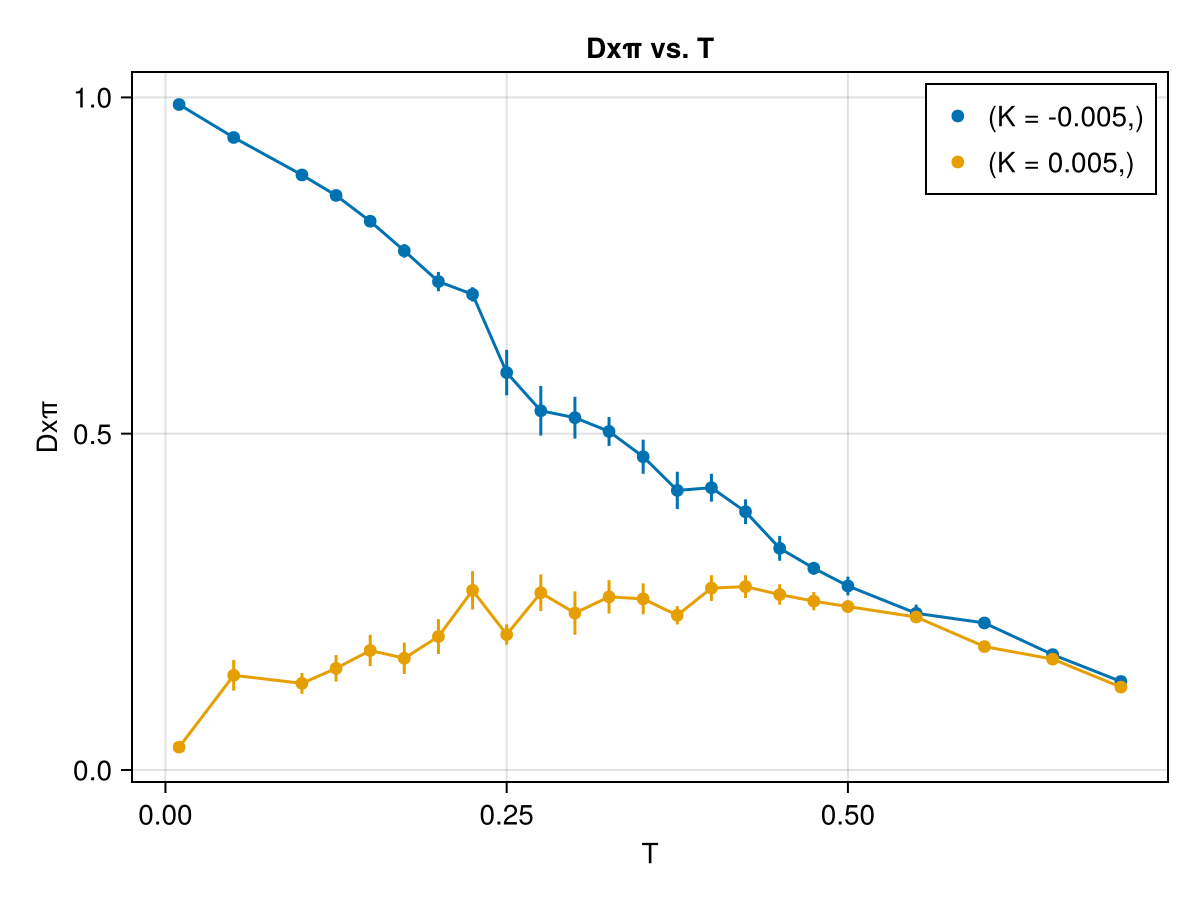

In [21]:
generatePlot(
    data, :T, :Dxπ;
    title="Dxπ vs. T",
    xlabel="T",
    ylabel="Dxπ",
    line=true
)

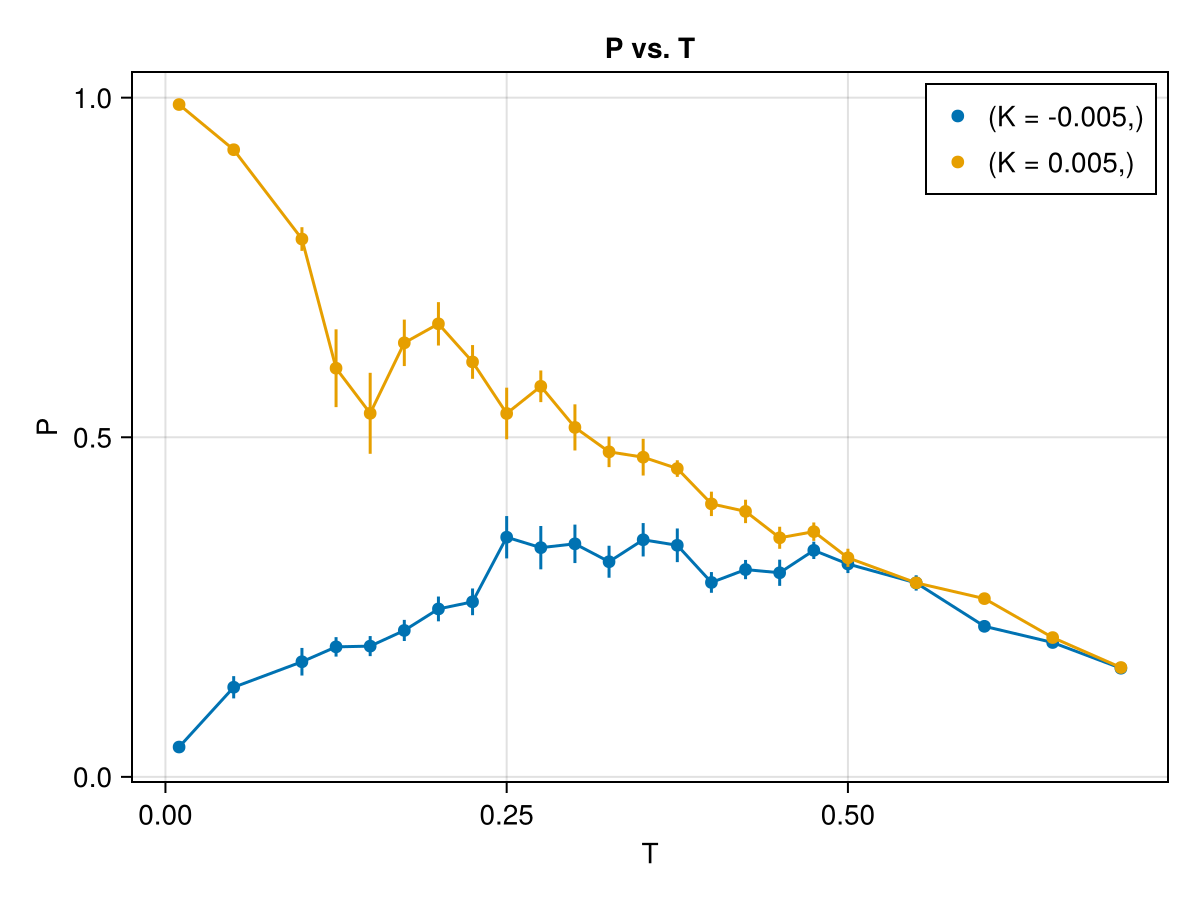

In [22]:
generatePlot(
    data, :T, :P;
    title="P vs. T",
    xlabel="T",
    ylabel="P",
    line=true
)

In [23]:
ungrouped_data = cleandata("../jobs/$jobname.results.json")

Row,T,K,Lx,Ly,Dxπ,Dyπ,P
,Float64,Float64,Int64,Int64,Measurem…,Measurem…,Measurem…
1,0.01,-0.005,20,20,0.98939±0.00036,0.98939±0.00036,0.0439±0.004
2,0.05,-0.005,20,20,0.9404±0.0033,0.9404±0.0033,0.132±0.016
3,0.1,-0.005,20,20,0.8847±0.0053,0.8846±0.0053,0.17±0.02
4,0.125,-0.005,20,20,0.8542±0.0051,0.8542±0.0051,0.191±0.014
5,0.15,-0.005,20,20,0.8158±0.0061,0.8158±0.0061,0.193±0.015
6,0.175,-0.005,20,20,0.772±0.01,0.772±0.01,0.216±0.016
7,0.2,-0.005,20,20,0.726±0.014,0.726±0.014,0.247±0.018
8,0.225,-0.005,20,20,0.707±0.011,0.707±0.011,0.258±0.02
9,0.25,-0.005,20,20,0.591±0.034,0.591±0.034,0.353±0.031


In [24]:
function generate_mctime_plot(task_no::Int)
    fig = Figure(size=(800, 400))

    ax_P = fig[1,1] = Axis(
        fig,
        title="P vs. Bin #",
        xlabel="Bin #",
        ylabel="P",
        xminorticksvisible=true
    )
    ax_Dxπ = fig[1,2] = Axis(
        fig,
        title="Dx(π) vs. Bin #",
        xlabel="Bin #",
        ylabel="Dx(π)",
        xminorticksvisible=true
    )

    task_str = lpad(task_no, 4, "0")
    h5open("../jobs/$jobname.data/task$task_str/run0001.meas.h5") do file
        observables = file["observables"]
        P_samples = read(observables, "P/samples")
        n = length(P_samples)
        init = 1
        lines!(
            ax_P,
            collect(init:n),
            P_samples[init:n],
        )
        Dxπ_samples = read(observables, "Dxπ/samples")
        lines!(
            ax_Dxπ,
            collect(init:n),
            Dxπ_samples[init:n],
        )
    end

    return fig
end

generate_mctime_plot (generic function with 1 method)

DataFrameRow
 Row │ T        K        Lx     Ly     Dxπ              Dyπ              P            
     │ Float64  Float64  Int64  Int64  Measurem…        Measurem…        Measurem…    
─────┼────────────────────────────────────────────────────────────────────────────────
   1 │    0.01   -0.005     20     20  0.98939±0.00036  0.98939±0.00036  0.0439±0.004

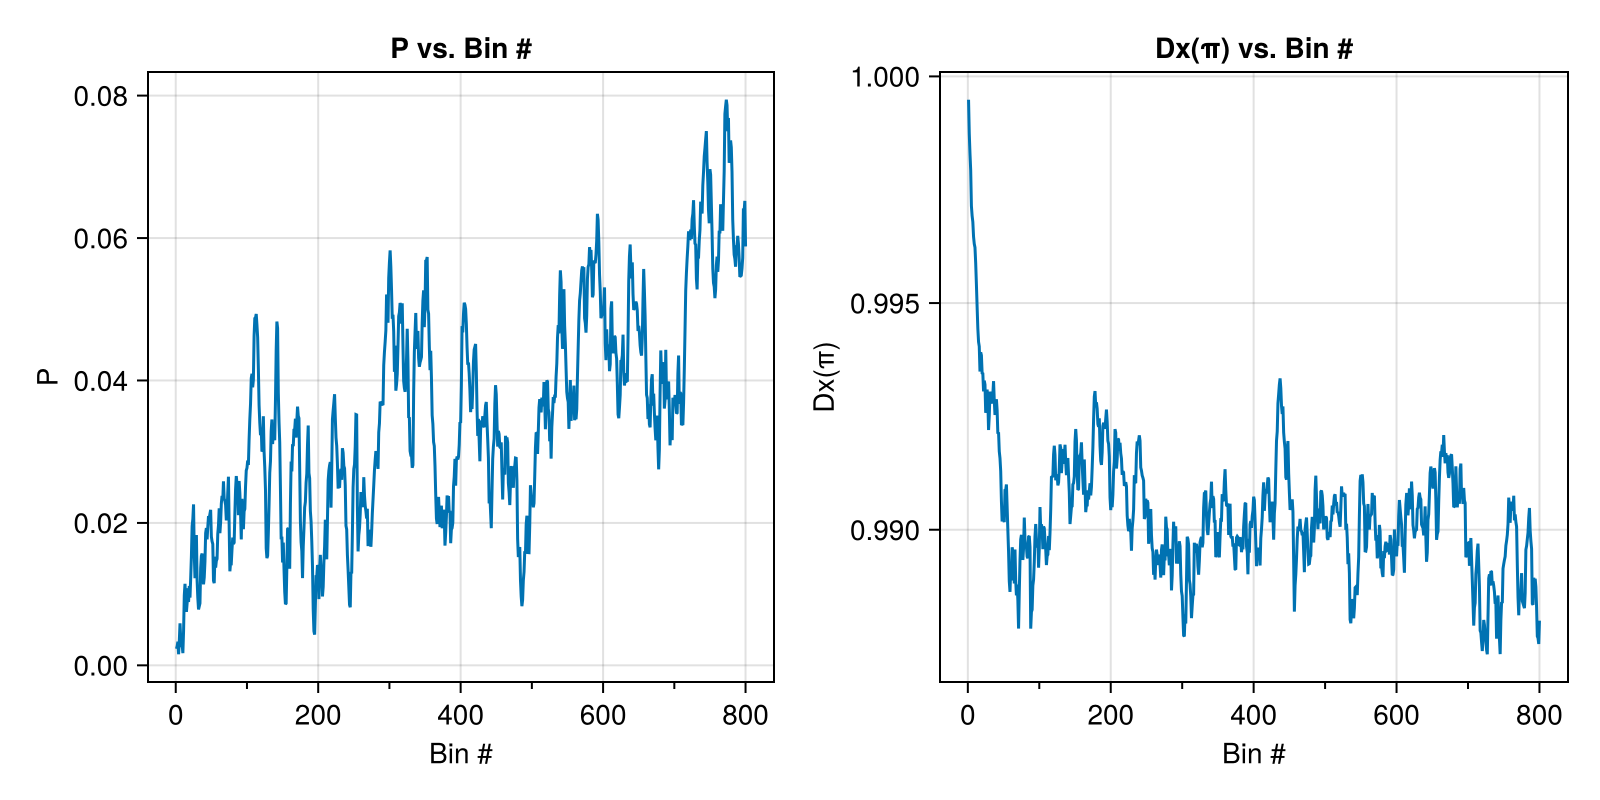

In [29]:
i = 1
print(ungrouped_data[i, :])
generate_mctime_plot(i)

In [26]:
task_no = "21"
file = h5open("../jobs/" * jobname * ".data/task00" * task_no * "/run0001.dump.h5")
spins = map(
    t -> [t[:data][1], t[:data][2], t[:data][3]],
    read(file, "simulation/spins")
)
spin_xs = map(v -> v[1], spins)
spin_ys = map(v -> v[2], spins)
spin_zs = map(v -> v[3], spins)
Lx, Ly = size(spins)
close(file)

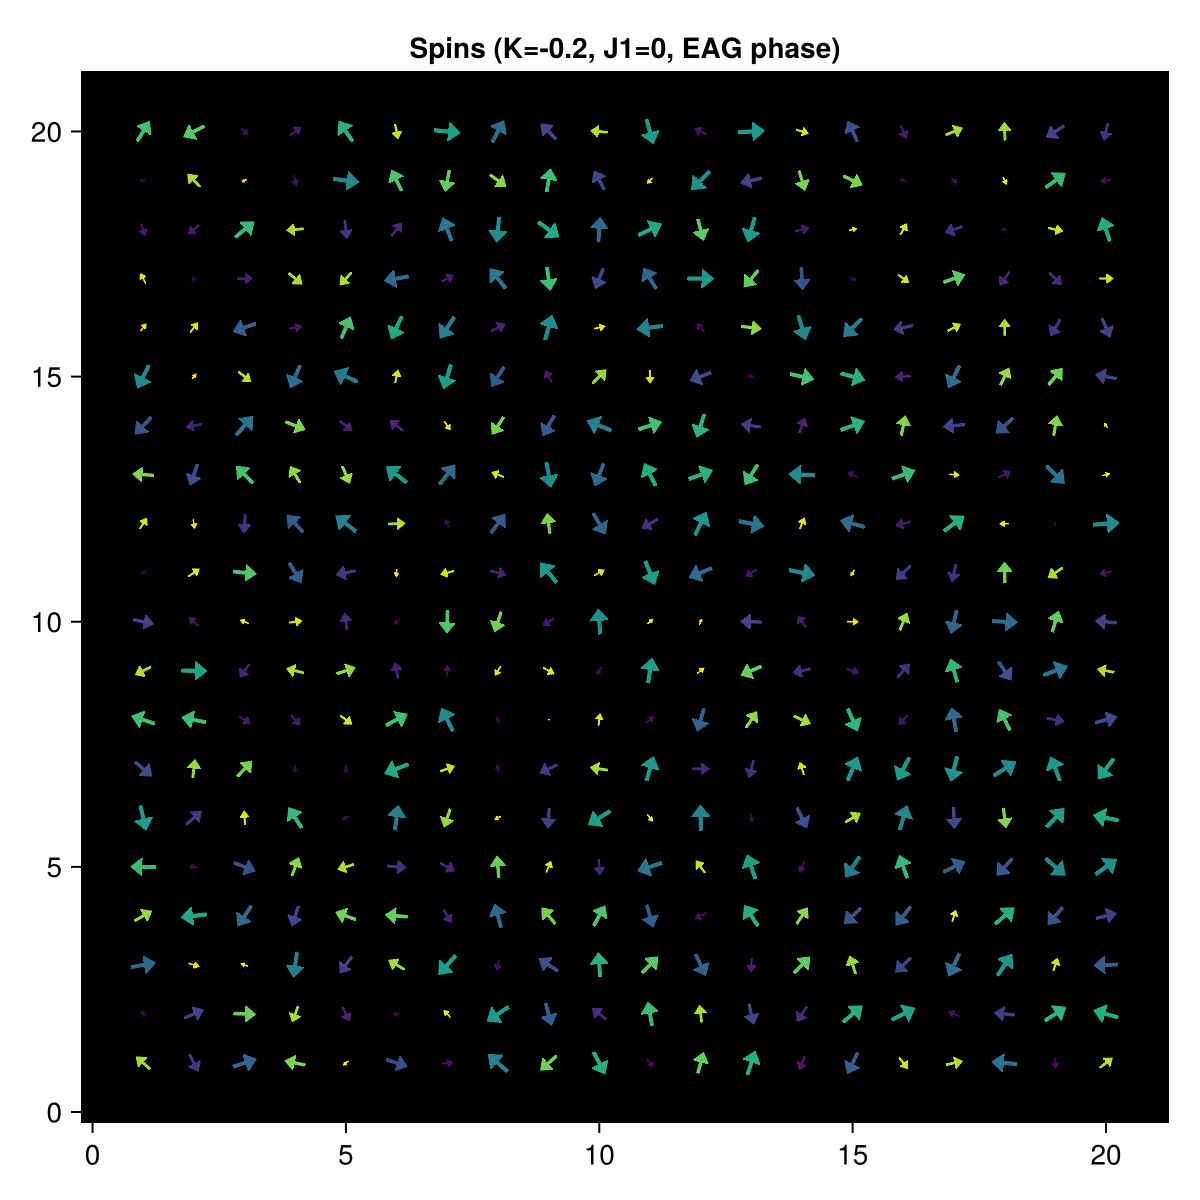

In [27]:
fig = Figure(size=(600, 600))
fig[1,1] = Axis(fig; title="Spins (K=-0.2, J1=0, EAG phase)", backgroundcolor="black")

strength = vec(spin_zs)
arrows2d!(1:Lx, 1:Ly, spin_xs, spin_ys, lengthscale=0.5, align=:center, color=strength)
fig

In [36]:
d = load("../jobs/$jobname.data/task$(lpad(i, 4, "0"))/spin-curr.jld")
d["sweep5000"]

20×20 Matrix{SVector{3, Float64}}:
 [0.0, -0.0351992, 0.0478235]     …  [-0.0, 0.0631473, 0.019635]
 [0.0, -0.00539395, -0.0154427]      [0.0, 0.0807804, -0.0408853]
 [0.0, -0.00947107, -0.0987695]      [0.0, 0.043489, -0.0126636]
 [0.0, -0.150246, -0.0412678]        [-0.0, 0.0220472, 0.0424978]
 [0.0, -0.159379, -0.0614267]        [0.0, -0.0578975, -0.0335404]
 [0.0, 0.021519, -0.124748]       …  [0.0, 0.0495438, -0.0299422]
 [-0.0, 0.0709211, 0.0310501]        [0.0, -0.0136995, 0.0282503]
 [0.0, -0.104798, 0.154048]          [0.0, -0.134741, 0.0752852]
 [0.0, -0.00444966, 0.12123]         [0.0, -0.101276, 0.000838841]
 [-0.0, 0.0250812, 0.0735863]        [0.0, 0.0421617, -0.00893954]
 [0.0, -0.0507992, 0.0508049]     …  [-0.0, 0.0263206, 0.134202]
 [0.0, -0.0493289, 0.0517278]        [0.0, -0.0985511, 0.162797]
 [0.0, -0.0724985, 0.0753871]        [0.0, -0.0318998, 0.170463]
 [0.0, -0.0720258, -0.000855418]     [-0.0, 0.00246199, 0.12375]
 [0.0, -0.097754, -0.0324286]        [-0.0, 0